# Laboratorium 2


### Konfiguracja

In [1]:
from definitions import *
from graham import *
from jarvis import *
from timeit import timeit

In [2]:
#konfiguracja zadania 3a
a_points_count = 100
a_range_x = (-100, 100)
a_range_y = (-100, 100)
#konfiguracja zadania 3b
b_points_count = 100
b_center = (0, 0)
b_radius = 10
#konfiguracja zadania 3c
c_points_count = 100
c_verts = [
    (-10, 10),
    (-10, -10),
    (10, -10),
    (10, 10)
]
#konfiguracja zadania 3d
d_points_on_edges_count = 25
d_points_on_diagonals_count = 20
d_verts = [
    (0, 0),
    (10, 0),
    (10, 10),
    (0, 10)
]

# Zbiory danych

In [3]:
dataset1 = generate_dataset(a_points_count, random_point_in_ranges(a_range_x, a_range_y))
dataset2 = generate_dataset(b_points_count, random_point_on_circle(b_center, b_radius))
dataset3 = generate_dataset(c_points_count, random_point_on_rect(c_verts))
def generate_dataset4():
    a, b, c, d = d_verts
    return [
        *generate_dataset(d_points_on_diagonals_count, random_point_on_segment(a, c)),
        *generate_dataset(d_points_on_diagonals_count, random_point_on_segment(b, d)),
        *generate_dataset(d_points_on_edges_count, random_point_on_segment(a, b)),
        *generate_dataset(d_points_on_edges_count, random_point_on_segment(a, d)) 
    ] + d_verts
dataset4 = generate_dataset4()

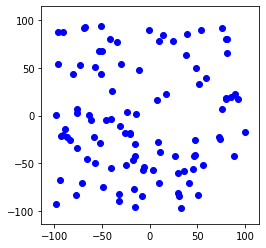

In [4]:
plot({ 'points': dataset1 })

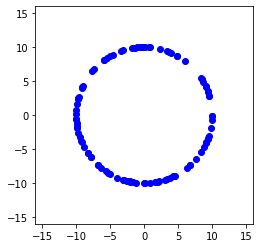

In [5]:
plot({ 'points': dataset2 })

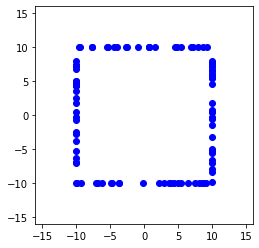

In [6]:
plot({ 'points': dataset3 })

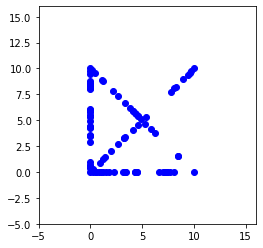

In [7]:
plot({ 'points': dataset4 })

# Algorytm Grahama

In [8]:
def graham(points, eps=10**-12, det=det):
    #1. Find point with smallest y, x
    p0 = min(points, key=flip)

    #2. Sort remaining points
    def partition(points):
        pivot, *tail = points
        low, high = [], []
        ret_pivot = pivot
        for p in tail:
            d = orientation(p0, pivot, p, det, eps)
            if d == INLINE:
                if dist_sq(p0, p) > dist_sq(p0, ret_pivot):
                    ret_pivot = p
            elif d == CCW: high.append(p)
            else: low.append(p)
        return low, ret_pivot, high

    def quick_sort(points):
        if len(points) <= 1: return points
        low, pivot, high = partition(points)
        return quick_sort(low) + [pivot] + quick_sort(high)

    #3. Initialize stack
    p1, p2, *tail = quick_sort(points)
    stack = [p0, p1, p2]

    #4. Execute the algorithm
    i, m = 0, len(tail)
    while i < m:
        pi = tail[i]
        if det(stack[-2], stack[-1], pi) > 0:
            stack.append(pi)
            i += 1
        else: stack.pop()
    return stack

## Legenda wykresu
* zielone punkty - puntky na otoczce
* czerwona linia - aktualnie rozpatrywana krawędź
* niebieska linia - krawędź otoczki

<IPython.core.display.Javascript object>


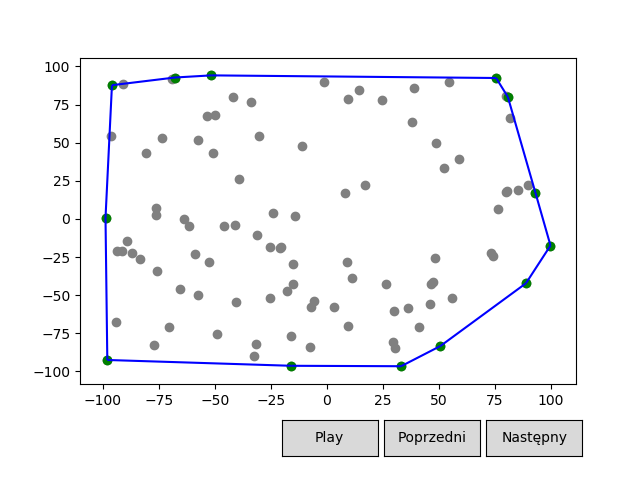

In [14]:
%matplotlib notebook
scenes = list(graham_visualization(dataset1))
plt = Plot(scenes)
plt.draw()

# Algorytm Jarvisa

In [10]:
def jarvis(points, eps=10**-12, det=det2):
    p = [min(points)]

    while True:
        m = points[0]
        for q in points:
            o = orientation(p[-1], m, q, det=det, eps=eps)
            if m == p[-1] or o == RIGHT: m = q
            elif o == INLINE and dist_sq(p[-1], m) < dist_sq(p[-1], q): m = q
        if m == p[0]:
            break
        p.append(m)

    return p

<IPython.core.display.Javascript object>


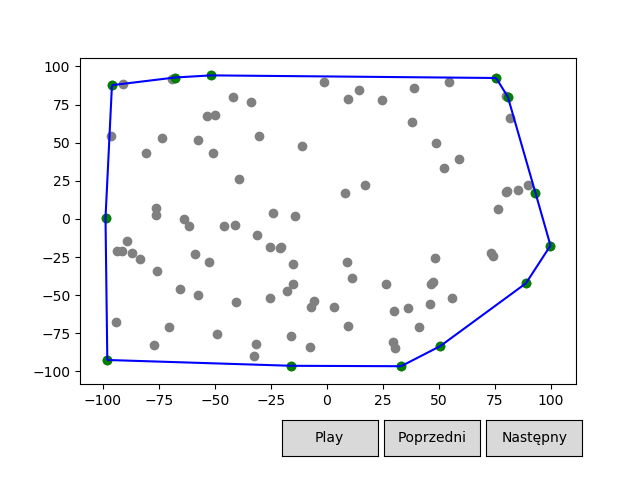

In [11]:
%matplotlib notebook
scenes = list(jarvis_visualization(dataset1))
plt = Plot(scenes)
plt.draw()

# Wydajność

In [15]:
datasets = [dataset1, dataset2, dataset3, dataset4]
for i, dataset in enumerate(datasets):
    print ("dataset: ", i + 1)
    print ("graham: ", timeit(lambda: graham(dataset), number=100))
    print ("jarvis: ", timeit(lambda: jarvis(dataset), number=100))
    print ()

dataset:  1
graham:  0.05515869999999978
jarvis:  0.07436049999999916

dataset:  2
graham:  0.05191319999999955
jarvis:  0.5652922

dataset:  3
graham:  0.049652399999999375
jarvis:  0.059921799999997916

dataset:  4
graham:  0.0380281999999994
jarvis:  0.03583809999999943



In [13]:
# save(graham(dataset1), "graham.json")